In [31]:
import pylab as plt
import seaborn as sns

import pandas as pd
import numpy as np

import polars as pl

from datetime import datetime, timedelta
pd.options.mode.chained_assignment = None


custom_params = {"axes.spines.right": False, "axes.spines.top": False, "axes.spines.left": False, "axes.spines.bottom":
False,"lines.linewidth": 2, "grid.color": "lightgray", "legend.frameon": False, "xtick.labelcolor": "#484848", "ytick.labelcolor":
"#484848", "xtick.color": "#484848", "ytick.color": "#484848","text.color": "#484848", "axes.labelcolor": "#484848",
"axes.titlecolor":"#484848","figure.figsize": [5,3],
"axes.titlelocation":"left","xaxis.labellocation":"left","yaxis.labellocation":"bottom"}
palette = ["#3d348b","#e6af2e","#191716","#e0e2db"] #use your favourite colours
sns.set_theme(context='paper', style='white', palette=palette, font='Verdana', font_scale=1.2, color_codes=True,
rc=custom_params)

from statsmodels.stats.proportion import proportion_confint
def calc_prop(x):
    N, N_inf = x
    return 100*proportion_confint(N_inf, N)[1]

In [7]:
path_results = "./results_paper"#"/Users/garci061/Dropbox/Apps/Overleaf/2023_rivm_covid/"
path_data = "./CBS_output/stats_coinfected.xlsx"


!mkdir $path_results/Tables
!mkdir $path_results/Figures

# Read data

In [8]:
df = pd.read_excel(path_data)
df.head()

,Group,Distance,N,N_inf
0,same_class_all,general,199840.0,705.0
1,same_class_all,-1-0,744.0,54.0
2,same_class_all,0-300,20049.0,71.0
3,same_class_all,300-1000,80083.0,257.0
4,same_class_all,1000-3000,75414.0,254.0


# Descriptive statistics

In [9]:
# Number of studied pairs
groups_study = ['same_class_infected', 'same_school_infected', 'different_inst_infected', 'baseline_infected'][::-1]
df_subset = df.loc[df["Group"].isin(groups_study)]
N_values = pd.pivot_table(df_subset, values=["N","N_inf"], index=["Distance"], columns="Group").swaplevel(axis=1)[groups_study]
N_values = N_values.loc[['-1-0', '0-300','300-1000', '1000-3000', '3000-10000','10000-30000',  
       '30000-300000', 'general']]
N_values.index = ["Same house", "<0.3 km", "0.3-1 km", "1-3 km", "3-10 km", "10-30 km", ">30 km", "Total"]

N_values.sum()

Group                         
baseline_infected        N        233857.0
                         N_inf      1239.0
different_inst_infected  N        426462.0
                         N_inf      2838.0
same_school_infected     N        100046.0
                         N_inf      1148.0
same_class_infected      N         79348.0
                         N_inf      1403.0
dtype: float64

In [10]:
# Fix missing values
N_values = N_values.applymap(lambda x: "<10" if np.isnan(x) else f"{x:,.0f}")
N_values.loc["Total", ("baseline_infected", "N")] = "233,857-233,867"
N_values.loc["Total", ("baseline_infected", "N_inf")] = "1,239-1,249"


# Format
N_values = N_values.rename(columns={"baseline_infected": "G1 (baseline)",
                         "different_inst_infected": "G2 (same background)",
                         "same_school_infected":  "G3 (same school)",
                         "same_class_infected":   "G4 (same program)"
                         }
               )

caption = "Number of student pairs (N) and student pairs co-infected within 14 days of each other (N\_inf) as a function of distance and background. G1: Pairs of students who did not attend the same primary (in 2020) or secondary schools (2021). G2--4: Attended the same primary school in 2020 and: G1 did not attend the same secondary school in 2021; G2: attended the same secondary school but different program; G3: attended the same secondary school and the same program."
with open(f"{path_results}/Tables/summary_pairs_raw.tex", "w+") as f:
    f.write(N_values.style.to_latex(label="t:summary_pairs", position="ht!", caption=caption, hrules=True).replace("{l","{r|"))
    
N_values

/var/folders/hx/nz98f65j615c4ygz7xt694700000gp/T/ipykernel_86325/3516298430.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  N_values = N_values.applymap(lambda x: "<10" if np.isnan(x) else f"{x:,.0f}")


Group         G1 (baseline)              G2 (same background)         \
                          N        N_inf                    N  N_inf   
Same house              <10          <10                   84     28   
<0.3 km                 908           11               18,726    141   
0.3-1 km              6,856           40               80,741    533   
1-3 km               33,199          150               78,547    501   
3-10 km             105,180          565               26,466    168   
10-30 km             49,247          259                5,947     33   
>30 km               38,467          214                2,720     15   
Total       233,857-233,867  1,239-1,249              213,231  1,419   

Group      G3 (same school)       G4 (same program)        
                          N N_inf                 N N_inf  
Same house               62    24               107    54  
<0.3 km               4,886    59             4,045    71  
0.3-1 km             19,883   222            16,301   257  
1-3 km               18,708   221            14,768   254  
3-10 km               5,890    44             4,011    62  
10-30 km                567   <10               407   <10  
>30 km                   27   <10                35   <10  
Total                50,023   578            39,674   705

In [11]:
# Number of studied pairs
groups_study = ['Co-Parents-102_infected', 'Parent-child-104_infected', 'Siblings-103_infected'][::-1]
df_subset = df.loc[df["Group"].isin(groups_study)]
N_values = pd.pivot_table(df_subset, values=["N","N_inf"], index=["Distance"], columns="Group").swaplevel(axis=1)[groups_study]
N_values = N_values.loc[['-1-0', '0-300','300-1000', '1000-3000', '3000-10000','10000-30000',  
       '30000-300000', 'general']]
N_values.index = ["Same house", "<0.3 km", "0.3-1 km", "1-3 km", "3-10 km", "10-30 km", ">30 km", "Total"]

N_values.sum()

# Fix missing values
N_values = N_values.applymap(lambda x: "<10" if np.isnan(x) else f"{x:,.0f}")


# Format
N_values = N_values.rename(columns={"Co-Parents-102_infected": "Co-parents",
                         "Parent-child-104_infected": "Parent-child",
                         "Siblings-103_infected":  "Siblings"
                         }
               )

caption = "Number of family pairs (N) and family pairs co-infected within 14 days of each other (N\_inf) as a function of distance and background."
with open(f"{path_results}/Tables/summary_pairs_family_raw.tex", "w+") as f:
    f.write(N_values.style.to_latex(label="t:summary_pairs_family", position="ht!", caption=caption, hrules=True).replace("{l","{r|"))
    
N_values

/var/folders/hx/nz98f65j615c4ygz7xt694700000gp/T/ipykernel_86325/2648452428.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  N_values = N_values.applymap(lambda x: "<10" if np.isnan(x) else f"{x:,.0f}")


Group        Siblings          Parent-child          Co-parents         
                    N    N_inf            N    N_inf          N    N_inf
Same house    888,288  205,326    1,447,899  328,507    807,156  330,502
<0.3 km       111,504    8,000       88,401   10,067      9,196      796
0.3-1 km      290,834   16,638      225,625   20,560     32,278    1,848
1-3 km        491,886   24,418      347,810   27,298     58,324    3,026
3-10 km       732,272   28,004      426,277   27,962     73,072    3,188
10-30 km      631,268   18,324      313,655   15,626     53,754    1,690
>30 km        939,994   22,542      419,501   16,659     52,748    1,008
Total       4,086,078  323,254    3,269,180  446,679  1,086,532  342,058

# Calculate share of pairs who co-infected

In [12]:

def calculate_ci(df_c, g1, g2, s=1000, prior=20):
    """
    Calculate the confidence interval for the ratio of infection probabilities between two groups.

    Parameters:
    - df_c: DataFrame with aggregated data for each group. Must contain 'N' (total cases) and 'N_inf' (infected cases).
    - g1: Identifier for the first group.
    - g2: Identifier for the second group.
    - s: Sample size for the Monte Carlo simulation. Default is 1000.

    Returns:
    - A NumPy array containing the 2.5th, 50th, and 97.5th percentiles of the ratio of infection probabilities.
    """
    # Extract the aggregated data for both groups
    N1, N_inf1 = df_c.loc[g1, ["N", "N_inf"]].values
    N2, N_inf2 = df_c.loc[g2, ["N", "N_inf"]].values
    
    # Generate beta distributions for both groups
    probs1 = np.random.beta(N_inf1 + 1/2, N1 - N_inf1 + 1/2 + prior, size=s)
    probs2 = np.random.beta(N_inf2 + 1/2, N2 - N_inf2 + 1/2 + prior, size=s)
    
    # Calculate the percentiles for the ratio of the two probabilities
    return np.percentile(probs1 / probs2, [2.5, 50, 97.5])

def merge_two(df, g1, g2, dist_s=['0-300', '300-1000', '1000-3000', '3000-10000'], s=10000, prior=20):
    """
    Preprocess data, aggregate by group, calculate infection probabilities and their errors, and compute confidence intervals.

    Parameters:
    - df: Original DataFrame containing 'Group', 'Distance', 'N', and 'N_inf' columns.
    - g1: Identifier for the first group.
    - g2: Identifier for the second group.
    - dist_s: List of distance ranges to include in the analysis. Default is ['0-300', '300-1000', '1000-3000', '3000-10000'].
    - s: Sample size for the Monte Carlo simulation in calculate_ci function. Default is 10000.

    Returns:
    - Confidence intervals for the ratio of infection probabilities between the two groups.
    """
    # Filter data for the specified groups and distance ranges
    df_c = df.loc[(df["Group"].isin([g1, g2])) & (df["Distance"].isin(dist_s))]
    
    # Aggregate the filtered data by group and sum up 'N' and 'N_inf'
    df_c = df_c.groupby("Group")[["N", "N_inf"]].sum()
    
    # Calculate the probability of infection for each group
    df_c["prob_inf"] = 100 * df_c["N_inf"] / df_c["N"]
    df_c["ci"] = df_c[["N", "N_inf"]].apply(lambda x: np.round(100*np.asarray(proportion_confint(x["N_inf"], x["N"])), 2), axis=1) 
    
    display(df_c)
    # Assuming calc_prop is a previously defined function that calculates the error in probability of infection
    # This line would subtract the calculated probability from its error for each group
    df_c["error"] = df_c[["N", "N_inf"]].apply(calc_prop, axis=1) - df_c["prob_inf"]

    # Compute and return the confidence interval for the ratio of infection probabilities
    return calculate_ci(df_c, g1, g2, s=s, prior=prior)


In [13]:
df["prob_inf"] = 100*df["N_inf"]/df["N"]
df["error"] = df[["N","N_inf"]].apply(calc_prop, axis=1)
df.head()

,Group,Distance,N,N_inf,prob_inf,error
0,same_class_all,general,199840.0,705.0,0.352782,0.378777
1,same_class_all,-1-0,744.0,54.0,7.258065,9.122340
2,same_class_all,0-300,20049.0,71.0,0.354132,0.436359
3,same_class_all,300-1000,80083.0,257.0,0.320917,0.360089
4,same_class_all,1000-3000,75414.0,254.0,0.336807,0.378158


In [14]:
students = sns.color_palette("Purples", 6)[-4:]
sns.color_palette(students)



[(0.6878892733564014, 0.6835832372164552, 0.829834678969627),
 (0.5513264129181085, 0.537916186082276, 0.7524490580545944),
 (0.440722798923491, 0.36772010765090346, 0.6653902345251825),
 (0.3405767012687428, 0.1742560553633218, 0.5709342560553633)]

In [15]:
g2c = {'baseline_infected': students[0], 
       'different_inst_infected': students[1], 
       'same_school_infected': students[2],
       'same_class_infected': students[3],
      'Co-Parents-102_infected': palette[1]+"55", 
       'Parent-child-104_infected': palette[1]+"AA", 
       'Siblings-103_infected': palette[1] }


,N,N_inf,prob_inf,ci
Group,,,,
baseline_infected,146143.0,766.0,0.524144,"[0.49, 0.56]"
different_inst_infected,204480.0,1343.0,0.656788,"[0.62, 0.69]"


different_inst_infected [15. 37.]


,N,N_inf,prob_inf,ci
Group,,,,
baseline_infected,146143.0,766.0,0.524144,"[0.49, 0.56]"
same_school_infected,49367.0,546.0,1.106002,"[1.01, 1.2]"


same_school_infected [ 89. 135.]


,N,N_inf,prob_inf,ci
Group,,,,
baseline_infected,146143.0,766.0,0.524144,"[0.49, 0.56]"
same_class_infected,39125.0,644.0,1.646006,"[1.52, 1.77]"


same_class_infected [183. 248.]


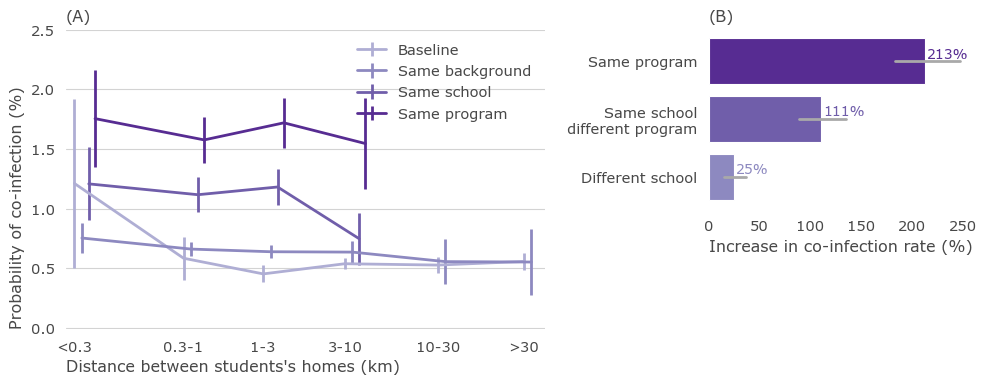

In [16]:
dist = ['0-300', '300-1000', '1000-3000', '3000-10000', '10000-30000', '30000-300000']
dist_labels = ["<0.3","0.3-1","1-3","3-10","10-30",">30"]
dist_num = np.array([int(_.split("-")[0])+100 for _ in dist])
groups = ['same_class_infected', 'same_school_infected', 'same_institution_infected', 
 'different_inst_infected', 'baseline_infected',
       'Co-Parents-102_infected', 
       'Parent-child-104_infected', 
       'Siblings-103_infected']

groups = ['baseline_infected', 'different_inst_infected','same_school_infected','same_class_infected']#,'same_class_infected']


fig = plt.figure(figsize=(10,4))
grid = fig.add_gridspec(3, 5)
# Larger subplot (2/3 of the figure)
ax1 = fig.add_subplot(grid[:, :3])


for i, group in enumerate(groups):
    data = df.loc[(df["Group"]==group) & (df["Distance"].isin(dist))]
    ax1.errorbar((1+i/10)*dist_num, 
                data["prob_inf"],
                yerr=data["error"]-data["prob_inf"],
                label = group,
                color = g2c[group])
plt.ylim(-0.01, 2.5)
plt.xlim(90, 1.3*max(dist_num))
#plt.yscale("log")
plt.xscale("log")
plt.grid(axis="y")
plt.legend(["Baseline","Same background","Same school","Same program"])
plt.xticks(dist_num, dist_labels)
#plt.yticks([0.3, 1, 3, 10, 30,  50],[ "0.3%","1%","3%","10%","30%","50%"])
plt.xlabel("Distance between students's homes (km)")
plt.ylabel("Probability of co-infection (%)")
plt.title("(A)")

# Smaller subplot (1/3 of the figure)
ax2 = fig.add_subplot(grid[:2, 3:])


for i, g in enumerate(["different_inst_infected","same_school_infected","same_class_infected"]):
    min_, med_, max_ = 100*(merge_two(df, g, "baseline_infected", prior=100)-1)
    print(g, np.round([min_, max_], 0))
    plt.plot([min_, max_], [i, i], color = "darkgray")
    plt.barh(i, med_,  color = g2c[g])
    plt.annotate(f"{med_:2.0f}%", (med_+2, i), fontsize=10, ha="left", va="bottom", color = g2c[g])
    #plt.scatter(med_, icolor = g2c[g])
plt.xlabel("Increase in co-infection rate (%)")
plt.yticks([0, 1, 2], ["Different school", "Same school\n different program", "Same program"])
plt.tight_layout()
plt.title("(B)")
plt.savefig(f"{path_results}/Figures/fig1.svg", bbox_inches="tight")


[  100   400  1100  3100 10100 30100]
['<0.3', '0.3-1', '1-3', '3-10', '10-30', '>30']


,N,N_inf,prob_inf,ci
Group,,,,
different_inst_infected,84.0,28.0,33.333333,"[23.25, 43.41]"
same_school_infected,62.0,24.0,38.709677,"[26.59, 50.83]"


same_school_infected [-27.  77.]


,N,N_inf,prob_inf,ci
Group,,,,
different_inst_infected,84.0,28.0,33.333333,"[23.25, 43.41]"
same_class_infected,107.0,54.0,50.467290,"[40.99, 59.94]"


same_class_infected [  9. 123.]


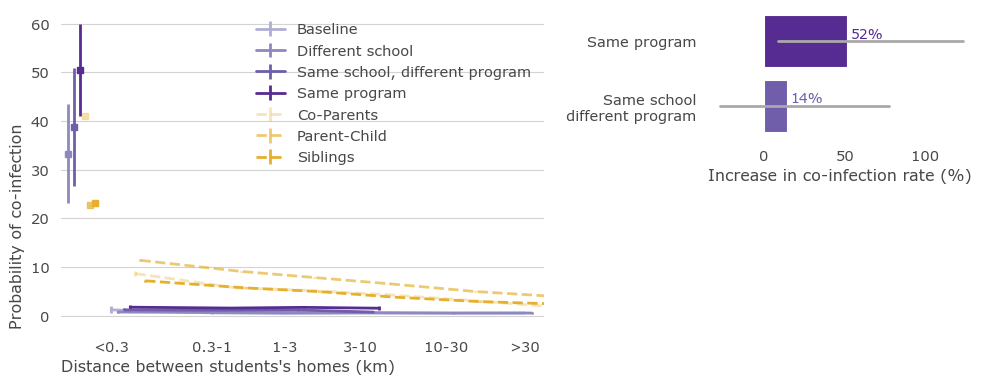

In [17]:
dist = ['0-300', '300-1000', '1000-3000', '3000-10000', '10000-30000', '30000-300000']
dist_labels = ["<0.3","0.3-1","1-3","3-10","10-30",">30"]
dist_num = np.array([int(_.split("-")[0])+100 for _ in dist])
groups = ['same_class_infected', 'same_school_infected', 'same_institution_infected', 
 'different_inst_infected', 'baseline_infected',
       'Co-Parents-102_infected', 
       'Parent-child-104_infected', 
       'Siblings-103_infected']

groups = ['baseline_infected', 'different_inst_infected','same_school_infected','same_class_infected',
         'Co-Parents-102_infected', 
       'Parent-child-104_infected', 
       'Siblings-103_infected']#,'same_class_infected']

fig = plt.figure(figsize=(10,4))
grid = fig.add_gridspec(4, 5)
# Larger subplot (2/3 of the figure)
ax1 = fig.add_subplot(grid[:, :3])


for i, group in enumerate(groups):
    data = df.loc[(df["Group"]==group) & (df["Distance"].isin(dist))]
    plt.errorbar((1+i/10)*dist_num, 
                data["prob_inf"],
                yerr=data["error"]-data["prob_inf"],
                label = group,
                color = g2c[group],
                linestyle="--" if "10" in group else "-")
plt.xlim(50, 1.3*max(dist_num))


for i, group in enumerate(groups):
    data = df.loc[(df["Group"]==group) & (df["Distance"].isin(['-1-0']))]
    plt.errorbar((1+i/10)*np.array([50]), 
                data["prob_inf"],
                yerr=data["error"]-data["prob_inf"],
                label = group,
                color = g2c[group],
                marker="s")

# plt.ylim(0.3, 80)

# plt.yscale("log")
plt.xscale("log")
plt.xticks(dist_num, dist_labels)
print(dist_num)
print(dist_labels)

plt.grid(axis="y")
plt.legend(["Baseline","Different school","Same school, different program","Same program", "Co-Parents","Parent-Child","Siblings"])
#plt.xticks(dist_num, dist_labels)
# plt.yticks([0.3, 1, 3, 10, 30,  50],[ "0.3%","1%","3%","10%","30%","50%"])
plt.xlabel("Distance between students's homes (km)")
plt.ylabel("Probability of co-infection")


# Smaller subplot (1/3 of the figure)
ax2 = fig.add_subplot(grid[:2, 3:])
for i, g in enumerate(["same_school_infected","same_class_infected"]):
    min_, med_, max_ = 100*(merge_two(df, g, "different_inst_infected", dist_s = ['-1-0'], prior=4)-1)
    print(g, np.round([min_, max_], 0))
    plt.plot([min_, max_], [i, i], color = "darkgray")
    plt.barh(i, med_,  color = g2c[g])
    plt.annotate(f"{med_:2.0f}%", (med_+2, i), fontsize=10, ha="left", va="bottom", color = g2c[g])
    #plt.scatter(med_, icolor = g2c[g])
plt.xlabel("Increase in co-infection rate (%)")
plt.yticks([0, 1], ["Same school\n different program", "Same program"])

plt.tight_layout()

plt.savefig(f"{path_results}/Figures/fig2.svg", bbox_inches="tight")


In [18]:
min_, med_, max_ = 100*(merge_two(df, "Parent-child-104_infected", "Siblings-103_infected",  prior=4)-1)

,N,N_inf,prob_inf,ci
Group,,,,
Parent-child-104_infected,1088113.0,85887.0,7.893206,"[7.84, 7.94]"
Siblings-103_infected,1626496.0,77060.0,4.737792,"[4.71, 4.77]"


In [19]:
min_, med_, max_ = 100*(merge_two(df, "Parent-child-104_infected", "Siblings-103_infected", dist_s = ['-1-0'], prior=4)-1)

,N,N_inf,prob_inf,ci
Group,,,,
Parent-child-104_infected,1447899.0,328507.0,22.688530,"[22.62, 22.76]"
Siblings-103_infected,888288.0,205326.0,23.114801,"[23.03, 23.2]"


# Other descriptive

In [29]:
# - Table 2: 20211220_aggregated.xlsx
# --> date: day of analysis
# --> count: number of people infected that day
# --> tested_pos: average number of neighbors testing positive
# --> tested_neg: average number of neighbors testing negative
# --> tested: average number of neighbors being tested
# --> total_neigb: average number of neighbors per person
# --> not_tested: averate number of neighbors not tested
# --> frac_positive: fraction of positive test (over all tested)
# --> frac_tested: average fraction of neighbors tested
# --> laag/code/label: type of network determining the neighbors 
df = pd.read_excel("./other_data/211222_0500_20211220_aggregated.xlsx")
df.set_index('date', inplace=True)

df_bo = df.loc[df["label"]=="klasgenoot - basis"].drop(columns=["label", "laag", "code"])
df_vo = df.loc[df["label"]=="klasgenoot - voortgezet"].drop(columns=["label", "laag", "code"])
#df_parents = df.loc[df["label"]=="co-ouder"]


# Resample by week and aggregate (e.g., sum)
df_bo = df_bo.rolling(window='7D').sum().reset_index()
df_vo = df_vo.rolling(window='7D').sum().reset_index()

df

,count,tested_pos,tested_neg,tested,total_neigb,not_tested,laag,code,label
date,,,,,,,,,
2020-09-15,65,14.0,85.0,99.0,2865.0,2766.0,school,501,klasgenoot - basis
2020-09-30,73,10.0,59.0,69.0,3088.0,3019.0,school,501,klasgenoot - basis
2020-10-04,108,18.0,72.0,90.0,4546.0,4456.0,school,501,klasgenoot - basis
2020-10-07,131,21.0,112.0,133.0,5867.0,5734.0,school,501,klasgenoot - basis
2020-10-08,161,24.0,109.0,133.0,6572.0,6439.0,school,501,klasgenoot - basis
...,...,...,...,...,...,...,...,...,...
2021-08-27,354,51.0,149.0,200.0,9267.0,9067.0,werk,401,collega
2021-08-28,314,50.0,107.0,157.0,7923.0,7766.0,werk,401,collega
2021-08-29,240,26.0,80.0,106.0,6597.0,6491.0,werk,401,collega


# School closures
#https://raw.githubusercontent.com/OxCGRT/covid-policy-dataset/main/data/OxCGRT_compact_national_v1.csv

Codebook: https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/codebook.md

0 - no measures
1 - recommend closing or all schools open with alterations resulting in significant differences compared to non-Covid-19 operations
2 - require closing (only some levels or categories, eg just high school, or just public schools)
3 - require closing all levels 

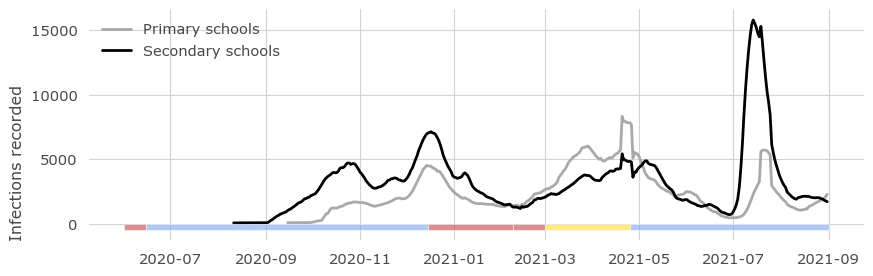

In [34]:
import polars as pl
df = (pl
 .scan_csv("other_data/school_closures_oxford.csv")
 .filter(
     (pl.col("CountryCode")=="NLD") &
     (pl.col("Date") < 20210900) &
     (pl.col("Date") > 20200531) 
        )
 .select("Date", "C1M_School closing", "C6M_Stay at home requirements", "C4M_Restrictions on gatherings")
 .collect()
 .to_pandas()
)
df['Date'] = pd.to_datetime(df['Date'].astype(str), format='%Y%m%d')

plt.figure(figsize=(10,3))
# plt.step(df["Date"], 2000*(df["C1M_School closing"]-1))


plt.plot(df_bo["date"], df_bo["count"], label="Primary schools", color = "darkgray")
plt.plot(df_vo["date"], df_vo["count"], label="Secondary schools", color="k")
plt.legend()

def plot_between(dates, value, color="gray"):
    closures = pd.DataFrame(
        {"Date": dates,
        "Value": [value, value]}
    )
    closures['Date'] = pd.to_datetime(closures['Date'].astype(str), format='%Y%m%d')
    plt.fill_between(closures["Date"], y1=closures["Value"], alpha=0.5, zorder=8, color=color, edgecolor=None)    

plot_between([20200601, 20200615], -500, "firebrick") #partially closes
plot_between([20200615, 20201215], -500, "cornflowerblue") #partially closes
plot_between([20201215, 20210208], -500, "firebrick") #fully closed
plot_between([20210208, 20210301], -500, "firebrick") #secondary closed
plot_between([20210301, 20210425], -500, "gold") #secondary open with restrictions (in-person but only 1-2 days/week)
plot_between([20210425, 20210901], -500, "cornflowerblue") #secondary open with restrictions (in-person but only 1-2 days/week)
plt.grid(True)
plt.ylabel("Infections recorded")
plt.savefig(f"{path_results}/Figures/infections_closure.pdf", bbox_inches="tight")
#plt.plot(df["Date"], 2000*df["C4M_Restrictions on gatherings"])
#plt.plot(df["Date"], 2000*df["C6M_Stay at home requirements"])
#Schools fully open from 15 June
#19th Dec 
#- Feb 8th: relaxation (primary schools open)
 	#2021-02-08
    #1 March 2021 --> secondary schools open
#-April 26th: no more restrictions

In [35]:
df

,Date,C1M_School closing,C6M_Stay at home requirements,C4M_Restrictions on gatherings
0,2020-06-01,2.0,1.0,3.0
1,2020-06-02,2.0,1.0,3.0
2,2020-06-03,2.0,1.0,3.0
3,2020-06-04,2.0,1.0,3.0
4,2020-06-05,2.0,1.0,3.0
...,...,...,...,...
452,2021-08-27,1.0,0.0,0.0
453,2021-08-28,1.0,0.0,0.0
454,2021-08-29,1.0,0.0,0.0
455,2021-08-30,1.0,0.0,0.0
